In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma
from functions_for_simulation import *

# rowNum, colNum = (5000, 1)时x的分组情况绘制

In [12]:
## initializing

## tau = 3

np.random.seed(111)

rowNum, colNum = (300, 1)

Xs = Xs_generator(rowNum, colNum, sigma_value=25)
Xs_average = Xs['x0'].mean()
# Xs = np.random.normal(0, 4, n)
Ws_1 = np.ones(rowNum) 
Ws_0 = np.zeros(rowNum)

Ys_1 = Ys_generator(Xs, Ws_1)
Ys_0 = Ys_generator(Xs, Ws_0)

tau = np.average(Ys_1['y']) - np.average(Ys_0['y'])
# # If we use the same eps, tau will be the constant 1.0 

print("The average treatment effect tau: {0:.3f}".format(tau))

The average treatment effect tau: 5.159


In [13]:
def Xs_randomization_output_plot(df, linewidth = 0.2, figsize=(20, 5)):

    x = df['x0']
    Ws = df['w']
    rowNum = df.shape[0]
    plt.figure(figsize=figsize)
    # plt.xticks(range(rowNum))
    # plt.yticks(range(-8, 9))
    plt.title(r'Randomization Output of $\mathbf{y}$: Treatment vs Control')
    plt.xlabel('Index')
    plt.ylabel('x')

    # color = ['red' if x == 1 else 'black' for x in Ws]
    # print(color)
    index_treatment = [i for i in range(rowNum) if Ws[i] == 1]
    Ys_treatment = x[index_treatment]
    index_control = [i for i in range(rowNum) if Ws[i] == 0]
    Ys_control = x[index_control]


    plt.scatter(index_treatment, Ys_treatment, color='#ffa500', label = 'treatment', edgecolors='black', linewidths=linewidth)
    plt.legend()

    plt.scatter(index_control, Ys_control,  color='#add8e6', label = 'controled', edgecolors='black', linewidths=linewidth)
    plt.legend()

    plt.axhline(y=0, color='grey', linestyle='--', linewidth = 0.7)
    plt.show()


def number_below_above_average(Xs, Ws):
    treatment_below_average = [1 if Xs['x0'][i] < Xs_average and Ws[i] == 1  else 0 for i in range(rowNum)]
    treatment_above_average = [1 if Xs['x0'][i] >= Xs_average and Ws[i] == 1  else 0 for i in range(rowNum)]
    control_below_average = [1 if Xs['x0'][i] < Xs_average and Ws[i] == 0  else 0 for i in range(rowNum)]
    control_above_average = [1 if Xs['x0'][i] >= Xs_average and Ws[i] == 0  else 0 for i in range(rowNum)]
    
    data = {
        'treatment_below_average': treatment_below_average,
        'treatment_above_average': treatment_above_average,
        'control_below_average': control_below_average,
        'control_above_average': control_above_average
    }
    df = pd.DataFrame(data)
    df_sum = df.sum()
    print(df_sum)

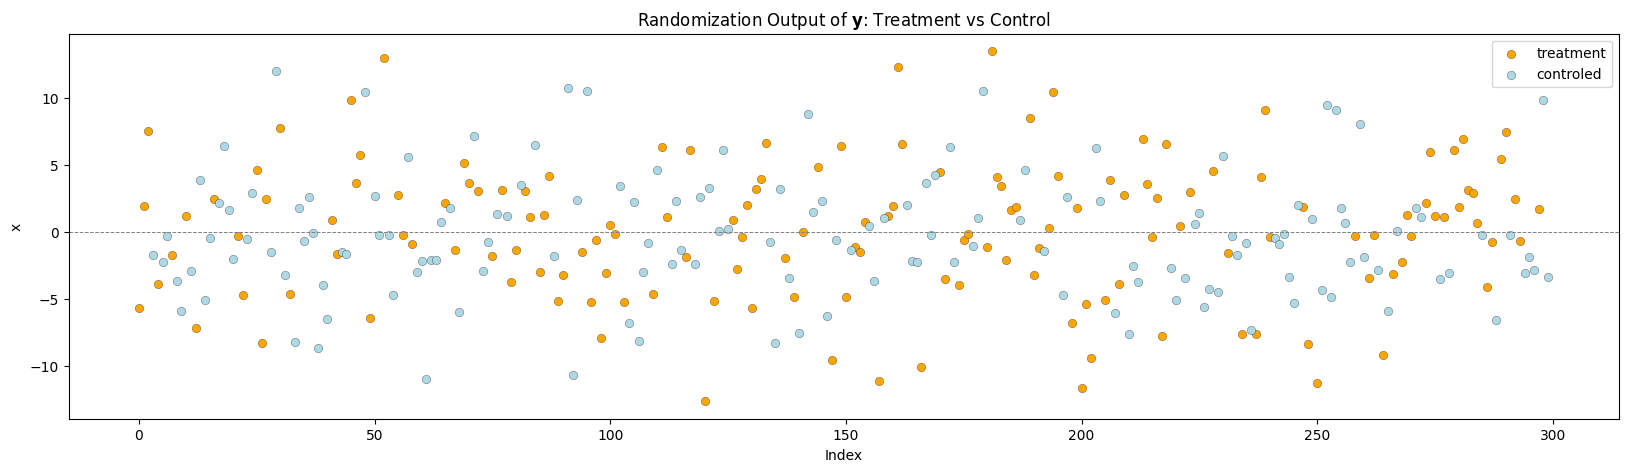

treatment_below_average    72
treatment_above_average    78
control_below_average      87
control_above_average      63
dtype: int64


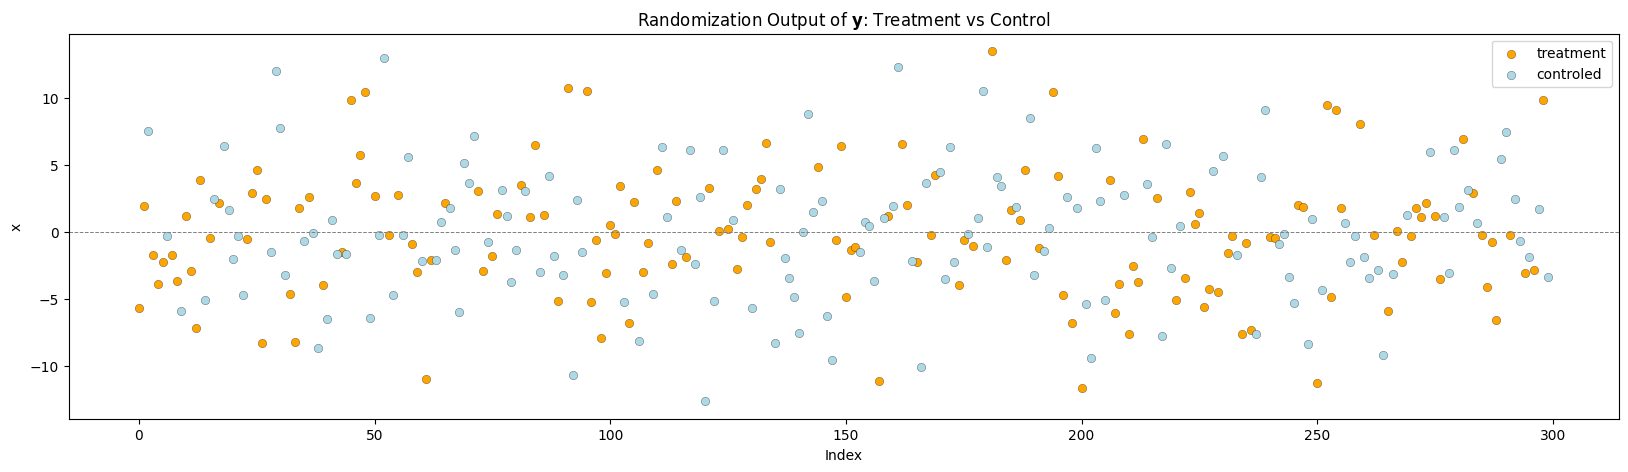

treatment_below_average    82
treatment_above_average    68
control_below_average      77
control_above_average      73
dtype: int64


In [14]:
# Output the current random seed
# seed = np.random.get_state()
# print('The current random seed is:', seed[1][0])

# np.random.seed(2107588339)

Ws_equal_size = Ws_generator_equal_size(Xs)
df_equal_size = Ys_generator(Xs, Ws_equal_size)
Xs_randomization_output_plot(df_equal_size)

number_below_above_average(Xs, Ws_equal_size)

Pa = 0.1
a = choice_of_threshold(colNum, Pa)
Ws_rerandomization = Ws_generator_rerandomization(Xs, a)
df_rerandomization = Ys_generator(Xs, Ws_rerandomization)
Xs_randomization_output_plot(df_rerandomization)

number_below_above_average(Xs, Ws_rerandomization)


# tau 不同方法的比较
1. boxplot 
2. 绘制表格展示$\hat{tau}$的均值和方差

In [15]:
## initializing

tau = 3.0

np.random.seed(99)

rowNum, colNum = (5000, 5)

Xs = Xs_generator(rowNum, colNum, sigma_value=25)
Xs_average = Xs['x0'].mean()
# Xs = np.random.normal(0, 4, n)
Ws_1 = np.ones(rowNum) 
Ws_0 = np.zeros(rowNum)

Ys_1 = Ys_generator(Xs, Ws_1, tau)
Ys_0 = Ys_generator(Xs, Ws_0, tau)

# # If we use the same eps, tau will be the constant 1.0 

print("The average treatment effect tau: {0:.3f}".format(np.average(Ys_1['y']) - np.average(Ys_0['y'])))

The average treatment effect tau: 3.255


In [16]:
tau_hats = []
iterNum = 10000

## 完全随机分组

for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats.append(tau_hat_calculator(df))
    # print("The estimated average treatment effect tau_hat {0:.3f} with Ws {1}.".format(tau_hat, Ws))


In [24]:
## 重随机化随机分组
tau_hats_rerandomization = []
## 需要及时更改threshold a
Pa = 0.5
a = choice_of_threshold(colNum, Pa)

for i in range(iterNum):
    Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats_rerandomization.append(tau_hat_calculator(df))

In [27]:
a

4.351460191095528

In [18]:
## AAtest 随机分组
tau_hats_AAtest = []
for i in range(iterNum):
    Ws = Ws_generator_AAtest(Xs, alpha=0.05, ifPrint=False)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats_AAtest.append(tau_hat_calculator(df))


In [19]:
## block 随机分组
tau_hats_block = []
for i in range(iterNum):
    Ws = Ws_generator_block(Xs)
    # print(Ws)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats_block.append(tau_hat_calculator(df))


In [20]:
##分层随机化

tau_hats_stratified = []

size = 3
random_cols = np.random.choice(Xs.columns, size=size, replace=False)
clarify_crition = {col: df[col].mean() for col in random_cols}
# clarify_crition
for i in range(iterNum):
    Ws = Ws_generator_stratified(Xs, clarify_crition)
    df = Ys_generator(Xs, Ws, tau=tau)
    tau_hats_stratified.append(tau_hat_calculator(df))

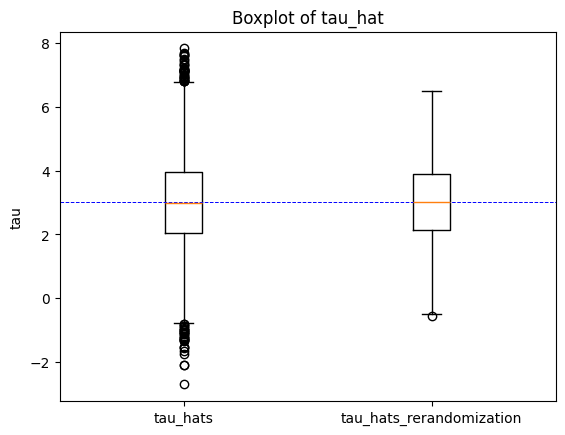

In [21]:
# boxplot
plt.boxplot([tau_hats, tau_hats_rerandomization])
plt.xticks([1, 2], ['tau_hats', 'tau_hats_rerandomization'])
# plt.boxplot(tau_hats_rerandomization)
plt.title('Boxplot of tau_hat')

# plt.axhline(y=3, color='blue', linestyle='--')
plt.axhline(y=tau, color='blue', linestyle='--', linewidth = 0.7)

# add axis label
plt.ylabel('tau')

plt.show()

C:\Users\19514\AppData\Local\Temp\ipykernel_19928\3339713940.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


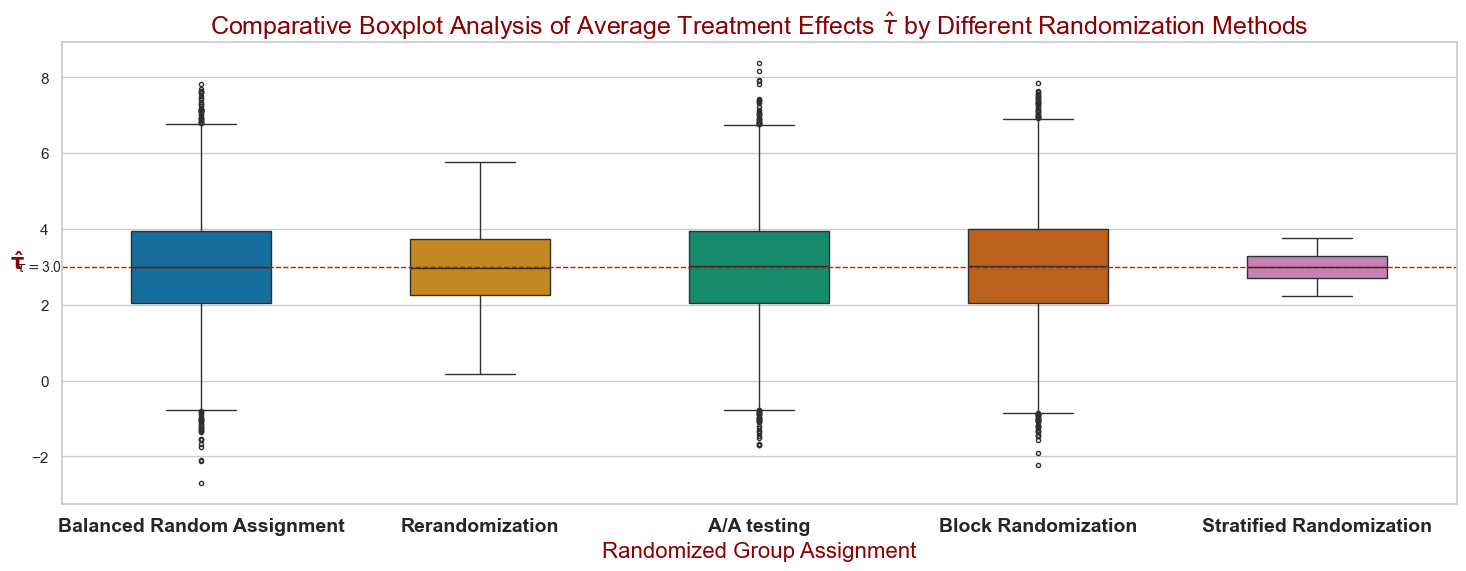

In [25]:
import seaborn as sns

data = pd.DataFrame({
    'Balanced Random Assignment': tau_hats,
    'Rerandomization': tau_hats_rerandomization,
    'A/A testing': tau_hats_AAtest,
    'Block Randomization': tau_hats_block,
    'Stratified Randomization': tau_hats_stratified
})

# 使用seaborn绘制箱线图
sns.set_theme(style='whitegrid') # 设置背景风格
plt.figure(figsize=(18, 6)) # 设置图形大小

# 绘制箱线图
ax = sns.boxplot(data=data, width=0.5, palette="colorblind", fliersize=3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


# texts = ['Balanced Random Assignment', 'Rerandomization', 'A/A test', 'Block randomization', 'Stratified Randomization']
# for tick, text in zip(range(len(texts)), texts):
#     plt.text(tick, 0, text, 
#              horizontalalignment='center', size=15, color='black', weight='semibold')

# 设置图表标题和坐标轴标签
plt.title(r"Comparative Boxplot Analysis of Average Treatment Effects $\hat\tau$ by Different Randomization Methods", fontsize=18, color='darkred')
plt.ylabel(r"$\mathbf{\hat{\tau}}$", rotation=0,labelpad=10,fontsize=15, color='darkred')
plt.xlabel("Randomized Group Assignment", fontsize=16, color='darkred')

plt.text(-0.5, tau, r'$\tau=${0}'.format(tau), fontsize=10, verticalalignment='center', horizontalalignment='right')
plt.axhline(y=tau, color='red', linestyle='--', linewidth = 1)

# 显示图形
plt.show()

# plt.savefig('Comparative Boxplot Analysis of Average Treatment Effects.png', dpi=300)

# plt.figure(figsize=(12, 5))
# # boxplot
# sns.boxplot([tau_hats, tau_hats_rerandomization, tau_hats_AAtest, tau_hats_block, tau_hats_stratified])
# plt.xticks([1, 2, 3, 4, 5], ['tau_hats', 'tau_hats_rerandomization', 'tau_hats_AAtest', 'tau_hats_block', 'tau_hats_stratified'])
# # plt.boxplot(tau_hats_rerandomization)
# plt.title('Boxplot of tau_hat')

# # plt.axhline(y=3, color='blue', linestyle='--')
# plt.axhline(y=tau, color='blue', linestyle='--', linewidth = 0.7)

# # add axis label
# plt.ylabel('tau')

# plt.show()

In [26]:
stats_df = pd.DataFrame({'mean': data.mean(), 'variance': data.var()})
stats_df
# 使用float_format参数将数值格式化为保留两位小数
latex_code = stats_df.to_latex(float_format="%.2f")

print(latex_code)

\begin{tabular}{lrr}
\toprule
 & mean & variance \\
\midrule
Balanced Random Assignment & 3.00 & 1.98 \\
Rerandomization & 2.99 & 1.04 \\
A/A testing & 3.01 & 1.90 \\
Block Randomization & 3.01 & 2.03 \\
Stratified Randomization & 3.00 & 0.13 \\
\bottomrule
\end{tabular}



In [101]:
import time

duringTimes = []

## 重随机化随机分组
All_tau_hats_rerandomization = []
## 需要及时更改threshold a
Pas = [i/10 for i in range(1, 11)]
for Pa in Pas:

    tau_hats_rerandomization = []
    a = choice_of_threshold(colNum, Pa)

    start_time = time.time()

    for i in range(iterNum):
        Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
        df = Ys_generator(Xs, Ws, tau=tau)
        tau_hats_rerandomization.append(tau_hat_calculator(df))
        
    end_time = time.time()
    execution_time = end_time - start_time
    duringTimes.append(execution_time)

    All_tau_hats_rerandomization.append(tau_hats_rerandomization)
    

In [102]:
data_pa = pd.DataFrame(All_tau_hats_rerandomization).transpose()
data_pa.columns = Pas
data_pa

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,3.730842,3.867831,2.223218,1.764842,1.958530,1.986230,2.516651,0.895431,2.696410,3.714951
1,2.962799,3.513572,1.930356,2.905273,3.198045,4.493743,3.020328,5.203476,1.204126,3.125747
2,3.428742,3.535784,4.337331,1.297347,4.134111,5.236265,3.503215,4.072500,5.644352,3.756300
3,3.772606,3.850836,4.442832,2.752634,2.092780,2.116301,2.097282,2.572068,1.155910,1.070900
4,2.990312,3.114136,4.012413,4.081739,2.488563,1.890316,4.960500,2.476635,0.685588,3.303771
...,...,...,...,...,...,...,...,...,...,...
9995,3.430177,2.946295,2.855972,4.316931,4.109129,3.699155,3.800833,2.019564,4.270163,5.330488
9996,1.947832,3.722769,3.124990,3.693415,2.723755,3.560006,4.904033,5.517480,1.665340,2.309714
9997,3.024820,2.310034,3.911751,2.710549,2.220704,4.989386,2.959666,3.604793,3.376811,0.597616
9998,2.631892,2.459620,5.215822,3.639780,2.781308,2.952934,2.106446,4.011817,1.867750,3.032990


In [122]:
stats_df = pd.DataFrame({'mean': data_pa.mean(), 'variance': data_pa.var()})
stats_df.index = Pas
# 使用float_format参数将数值格式化为保留两位小数
latex_code = stats_df.to_latex(float_format="%.2f")

print(latex_code)

\begin{tabular}{lrr}
\toprule
 & mean & variance \\
\midrule
0.100000 & 3.00 & 0.44 \\
0.200000 & 3.00 & 0.62 \\
0.300000 & 2.99 & 0.79 \\
0.400000 & 3.01 & 0.92 \\
0.500000 & 3.02 & 1.04 \\
0.600000 & 2.99 & 1.21 \\
0.700000 & 3.00 & 1.34 \\
0.800000 & 3.00 & 1.52 \\
0.900000 & 2.98 & 1.70 \\
1.000000 & 3.02 & 1.99 \\
\bottomrule
\end{tabular}



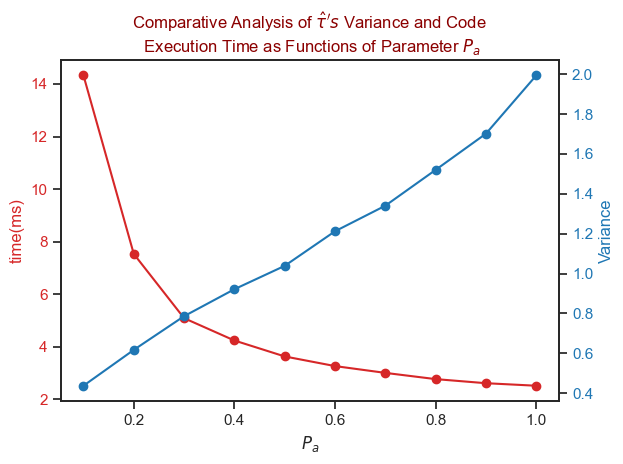

In [126]:

from matplotlib.pyplot import MultipleLocator

# 创建数据
data = pd.DataFrame({
    'x': Pas,
    'y1': np.array(duringTimes)/iterNum*1000,
    'y2': data_pa.var()
})

sns.set_theme(style='ticks')
fig, ax1 = plt.subplots()

plt.title(r"Comparative Analysis of $\hat{\tau}'s$ Variance and Code "+"\n Execution Time as Functions of Parameter "+r"$P_a$", color='darkred')

color = 'tab:red'
ax1.set_xlabel(r'$P_a$')
ax1.set_ylabel("time(ms)", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(data['x'], data['y1'], color=color, marker = 'o')

ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax2 = ax1.twinx()  # 创建共用x轴的第二个y轴

color = 'tab:blue'
ax2.set_ylabel('Variance', color=color)
ax2.plot(data['x'], data['y2'], color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

C:\Users\19514\AppData\Local\Temp\ipykernel_19928\984096937.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


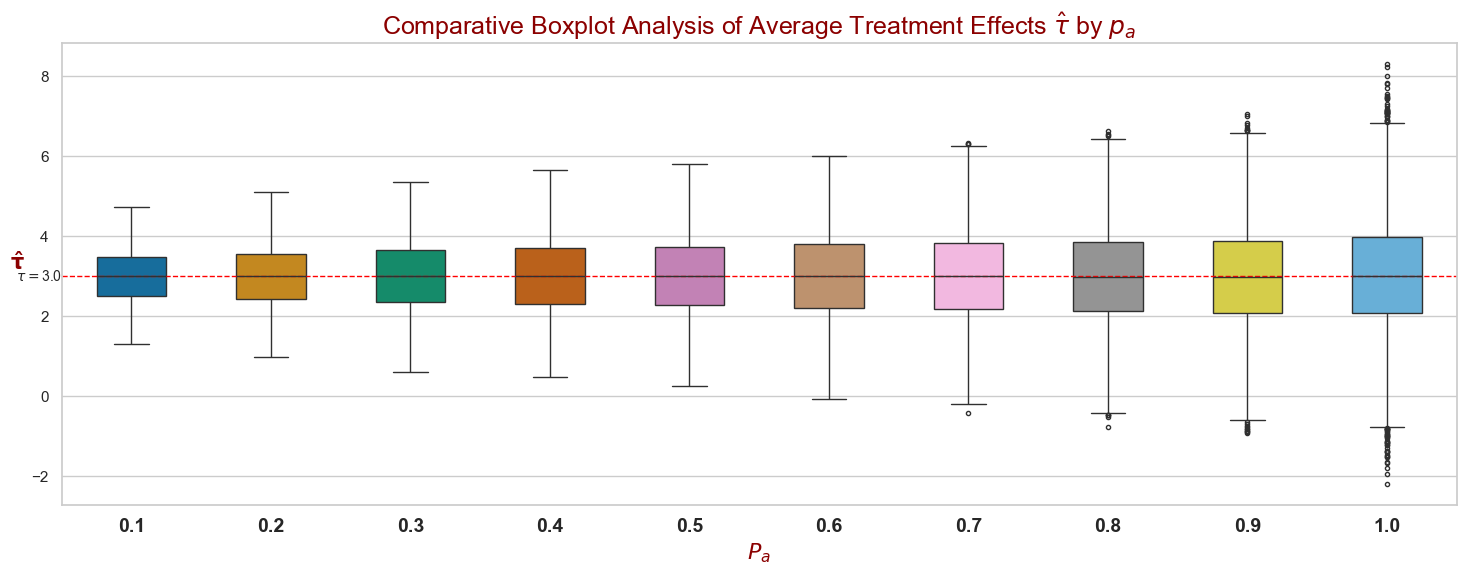

In [120]:


# 使用seaborn绘制箱线图
sns.set_theme(style='whitegrid') # 设置背景风格
plt.figure(figsize=(18, 6)) # 设置图形大小

# 绘制箱线图
ax = sns.boxplot(data=data_pa, width=0.5, palette="colorblind", fliersize=3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')


# texts = ['Balanced Random Assignment', 'Rerandomization', 'A/A test', 'Block randomization', 'Stratified Randomization']
# for tick, text in zip(range(len(texts)), texts):
#     plt.text(tick, 0, text, 
#              horizontalalignment='center', size=15, color='black', weight='semibold')

# 设置图表标题和坐标轴标签
plt.title(r"Comparative Boxplot Analysis of Average Treatment Effects $\hat\tau$ by $p_a$", fontsize=18, color='darkred')
plt.ylabel(r"$\mathbf{\hat{\tau}}$", rotation=0,labelpad=10,fontsize=15, color='darkred')
plt.xlabel("$P_a$", fontsize=16, color='darkred')

plt.text(-0.5, tau, r'$\tau=${0}'.format(tau), fontsize=10, verticalalignment='center', horizontalalignment='right')
plt.axhline(y=tau, color='red', linestyle='--', linewidth = 1)

# 显示图形
plt.show()

# plt.savefig('Comparative Boxplot Analysis of Average Treatment Effects.png', dpi=300)

# plt.figure(figsize=(12, 5))
# # boxplot
# sns.boxplot([tau_hats, tau_hats_rerandomization, tau_hats_AAtest, tau_hats_block, tau_hats_stratified])
# plt.xticks([1, 2, 3, 4, 5], ['tau_hats', 'tau_hats_rerandomization', 'tau_hats_AAtest', 'tau_hats_block', 'tau_hats_stratified'])
# # plt.boxplot(tau_hats_rerandomization)
# plt.title('Boxplot of tau_hat')

# # plt.axhline(y=3, color='blue', linestyle='--')
# plt.axhline(y=tau, color='blue', linestyle='--', linewidth = 0.7)

# # add axis label
# plt.ylabel('tau')

# plt.show()

In [146]:
##分层随机化

all_tau_hats_stratified = []
duringTimes = []

sizes = [i for i in range(1, 6)]
for size in sizes:

    tau_hats_stratified = []
    random_cols = np.random.choice(Xs.columns, size=size, replace=False)
    clarify_crition = {col: df[col].mean() for col in random_cols}
    # clarify_crition

    start_time = time.time()

    for i in range(iterNum):
        Ws = Ws_generator_stratified(Xs, clarify_crition)
        df = Ys_generator(Xs, Ws, tau=tau)
        tau_hats_stratified.append(tau_hat_calculator(df))

    end_time = time.time()
    execution_time = end_time - start_time
    print('size: {0}, execution time: {1}'.format(size, execution_time))
    duringTimes.append(execution_time)
    
    all_tau_hats_stratified.append(tau_hats_stratified)

size: 1, execution time: 221.49445939064026
size: 2, execution time: 297.5375454425812
size: 3, execution time: 372.3422932624817
size: 4, execution time: 456.14797282218933
size: 5, execution time: 541.3367927074432


In [143]:
data_size = pd.DataFrame(all_tau_hats_stratified).transpose()
data_size.columns = sizes
data_size

,1,2,3,4,5
0,4.507856,3.181864,3.318946,2.618663,1.746586
1,4.286382,4.711798,2.731412,2.094092,2.565105
2,3.612347,-0.566686,3.104216,3.915058,4.044715
3,1.492935,4.240308,3.176293,2.544067,2.364226
4,3.910203,2.690333,2.656422,3.328599,3.778255
...,...,...,...,...,...
9995,2.023480,5.200743,2.861501,2.745396,3.127040
9996,4.581578,5.126719,2.494505,2.992896,1.696710
9997,4.989731,1.865198,3.313891,3.381720,3.061645
9998,4.318585,1.599013,2.890213,2.771504,3.533880


In [145]:
data_size.var()

1    1.100284
2    6.270730
3    0.121312
4    0.318226
5    0.483342
dtype: float64

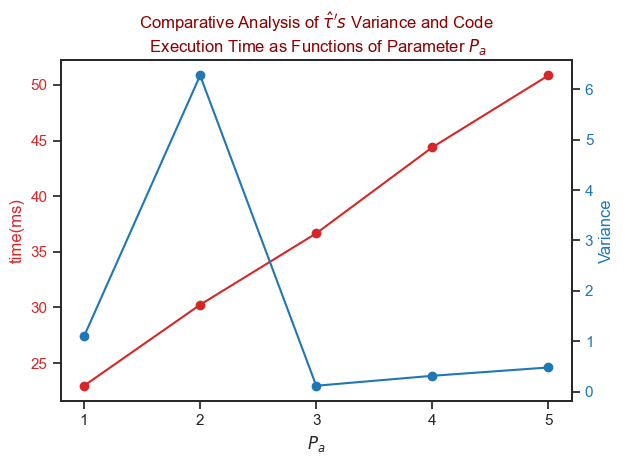

In [144]:
from matplotlib.pyplot import MultipleLocator

# 创建数据
data = pd.DataFrame({
    'x': sizes,
    'y1': np.array(duringTimes)/iterNum*1000,
    'y2': data_size.var()
})

sns.set_theme(style='ticks')
fig, ax1 = plt.subplots()

plt.title(r"Comparative Analysis of $\hat{\tau}'s$ Variance and Code "+"\n Execution Time as Functions of Parameter "+r"$P_a$", color='darkred')

color = 'tab:red'
ax1.set_xlabel(r'$P_a$')
ax1.set_ylabel("time(ms)", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(data['x'], data['y1'], color=color, marker = 'o')

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax2 = ax1.twinx()  # 创建共用x轴的第二个y轴

color = 'tab:blue'
ax2.set_ylabel('Variance', color=color)
ax2.plot(data['x'], data['y2'], color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()